In [1]:
'''
35100006_visualization 
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../dataset/Youth admissions to correctional services, by age and sex.csv")


C:\Users\2679s\AppData\Local\Temp\ipykernel_25936\2383786258.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../assets/dataset/Youth admissions to correctional services, by age and sex.csv")


# step 1 data wrangling

In [3]:
df.head()

,REF_DATE,GEO,DGUID,Sex,Age at time of admission,Correctional services,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2012/2013,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by age",Total correctional services,Number,223,units,0,v32458179,1.1.1.1,24425.0,NaN,NaN,NaN,0
1,2012/2013,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by age",Pre-trial detention,Number,223,units,0,v32458180,1.1.1.2,8225.0,NaN,NaN,NaN,0
2,2012/2013,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by age",Provincial director remand,Number,223,units,0,v32458181,1.1.1.3,417.0,NaN,NaN,NaN,0
3,2012/2013,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by age",Secure custody,Number,223,units,0,v32458182,1.1.1.4,822.0,NaN,NaN,NaN,0
4,2012/2013,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by age",Custody and supervision (secure),Number,223,units,0,v32458183,1.1.1.5,NaN,..,NaN,t,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66240 entries, 0 to 66239
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   REF_DATE                  66240 non-null  object 
 1   GEO                       66240 non-null  object 
 2   DGUID                     63504 non-null  object 
 3   Sex                       66240 non-null  object 
 4   Age at time of admission  66240 non-null  object 
 5   Correctional services     66240 non-null  object 
 6   UOM                       66240 non-null  object 
 7   UOM_ID                    66240 non-null  int64  
 8   SCALAR_FACTOR             66240 non-null  object 
 9   SCALAR_ID                 66240 non-null  int64  
 10  VECTOR                    66240 non-null  object 
 11  COORDINATE                66240 non-null  object 
 12  VALUE                     42876 non-null  float64
 13  STATUS                    23364 non-null  object 
 14  SYMBOL

In [148]:
df.describe()

,UOM_ID,SCALAR_ID,VALUE,SYMBOL,DECIMALS
count,66240.0,66240.0,42876.000000,0.0,66240.0
mean,223.0,0.0,80.790186,NaN,0.0
std,0.0,0.0,523.025745,NaN,0.0
min,223.0,0.0,0.000000,NaN,0.0
25%,223.0,0.0,0.000000,NaN,0.0
50%,223.0,0.0,0.000000,NaN,0.0
75%,223.0,0.0,11.000000,NaN,0.0
max,223.0,0.0,24425.000000,NaN,0.0


In [149]:
# replace missing values with 0
df['VALUE'].replace(np.nan,0.0001,inplace=True)

In [150]:
df['VALUE'].iloc[61:73]

61       0.0001
62       0.0001
63       0.0001
64       0.0001
65      64.0000
66       0.0001
67       0.0001
68       0.0001
69       0.0001
70    1189.0000
71      89.0000
72      28.0000
Name: VALUE, dtype: float64

# step2 data visualization


## 1 line chart by sex
sex-females and males in the same line charts<br>
display the trend during ten years from 2012/2013 to 2021/2022 in each GEO<br>

In [151]:
geo_features = df.drop_duplicates(subset=["GEO"],keep='first')["GEO"]
geo_features = geo_features.tolist()
for name in ['Ontario, Ministry of Children and Youth Services (MCYS)','Ontario, Ministry of Community Safety and Correctional Services (MCSCS)']:
    geo_features.remove(name)
geo_features

['Provinces and territories',
 'Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia',
 'Yukon',
 'Northwest Territories',
 'Nunavut']

In [152]:
date_features = df.drop_duplicates(subset=["REF_DATE"],keep='first')["REF_DATE"]
date_features = date_features.tolist()
date_features

['2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [153]:
def plotAdmissionRelease(geo_features):
    for feature in geo_features:
        df_geo_0 = df[df.GEO==feature]
        df_geo_1 = df_geo_0[df_geo_0['Sex'] =='Males']
        df_geo_1 = df_geo_1[df_geo_1['Age at time of admission'] =='Total, admissions by age']
        df_geo_1 = df_geo_1[df_geo_1['Correctional services'] =='Total correctional services']

        df_geo_1.rename(columns={'Sex': 'male'}, inplace=True)
        df_geo_1.reset_index(drop=True, inplace=True)

        df_geo_2 = df_geo_0[df_geo_0['Sex'] =='Females']
        df_geo_2 = df_geo_2[df_geo_2['Age at time of admission'] =='Total, admissions by age']
        df_geo_2 = df_geo_2[df_geo_2['Correctional services'] =='Total correctional services']

        df_geo_2.rename(columns={'Sex': 'femal'}, inplace=True)
        df_geo_2.reset_index(drop=True, inplace=True)
        df_year = pd.DataFrame({'REF_DATE':df_geo_1['REF_DATE'],'male':df_geo_1['VALUE'],'female':df_geo_2['VALUE']})
        df_year.index = df_year['REF_DATE']
        
        positions = [i for i in range(10)]
        labels = date_features
        ax = df_year.plot(figsize=(12,6),title= feature,x_compat=True)
        ax.set_xticks(positions)
        ax.set_xticklabels(labels)
        # df_year.plot()

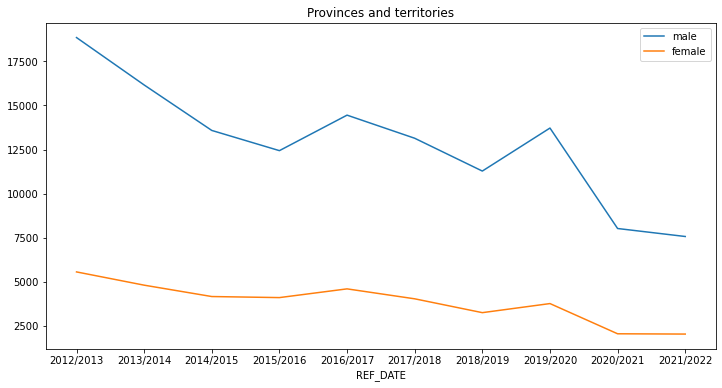

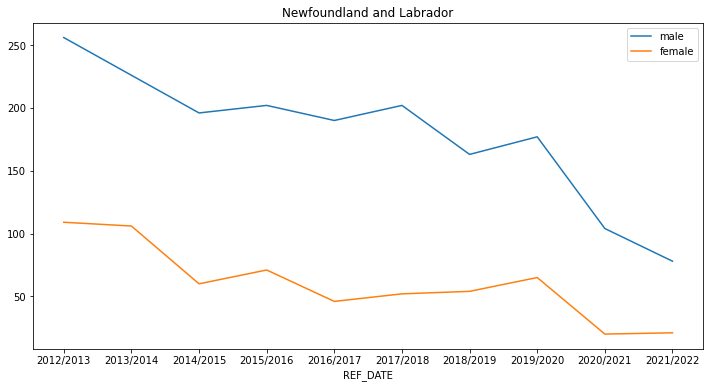

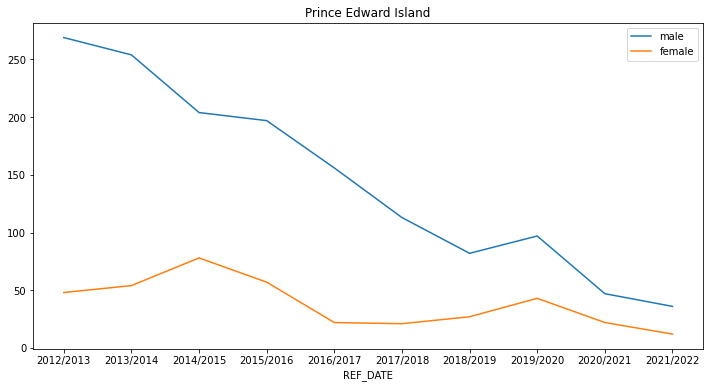

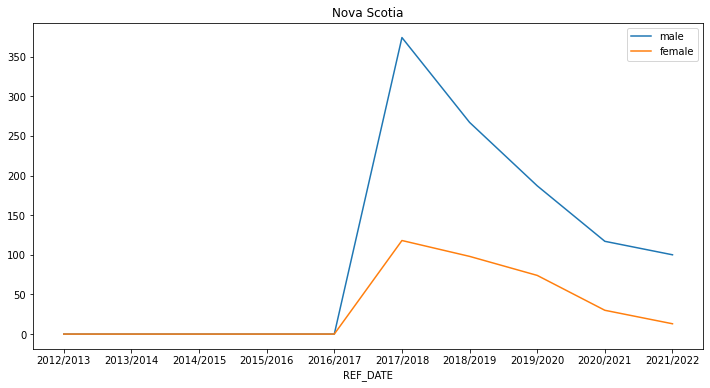

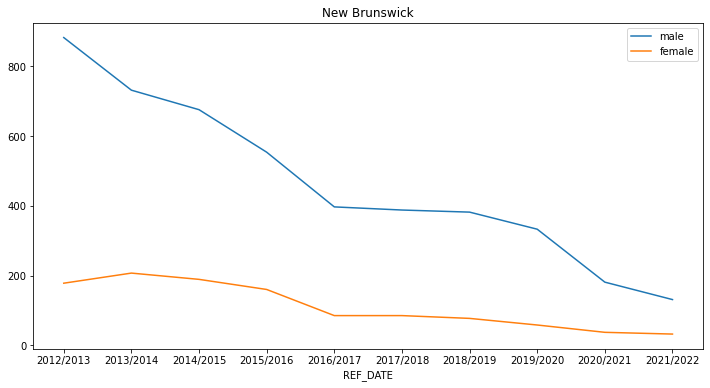

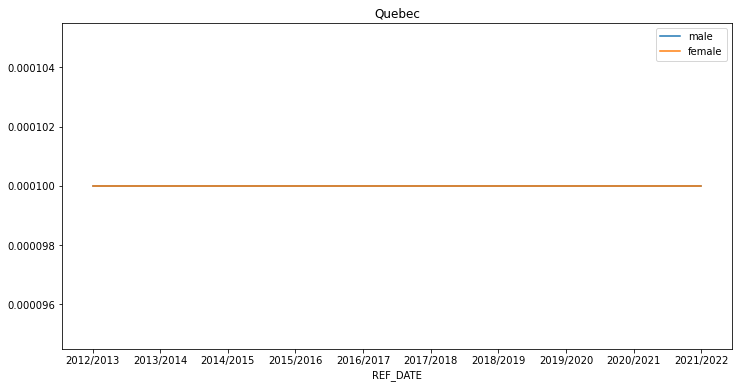

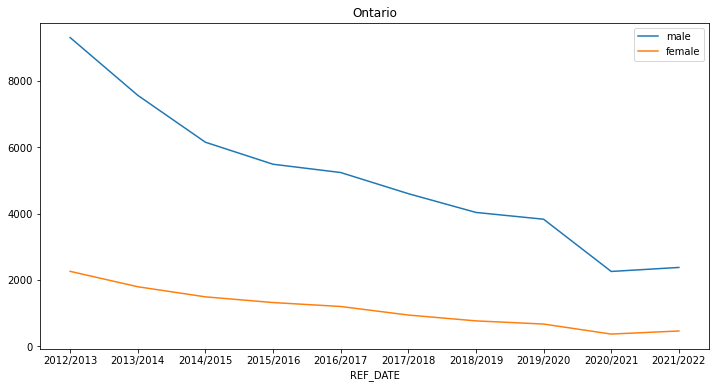

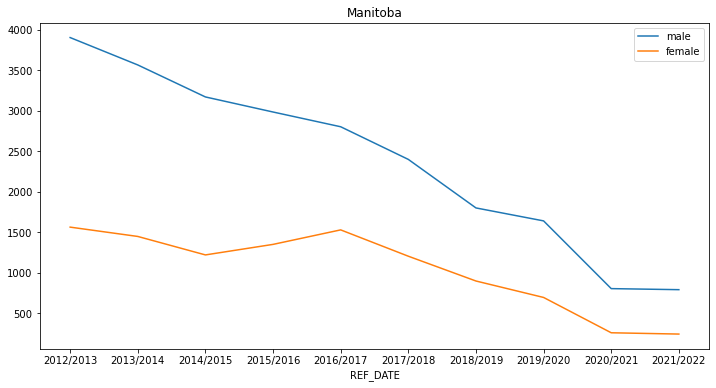

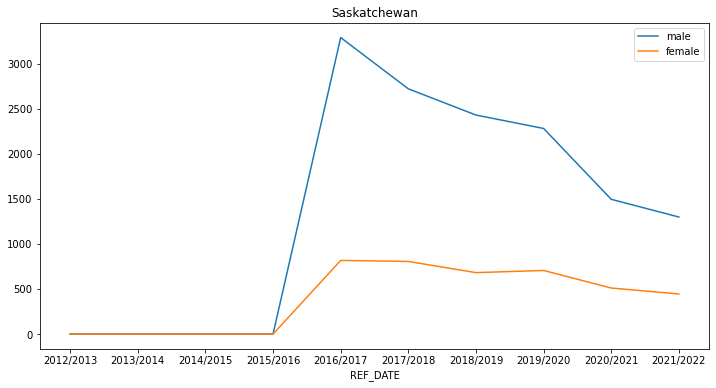

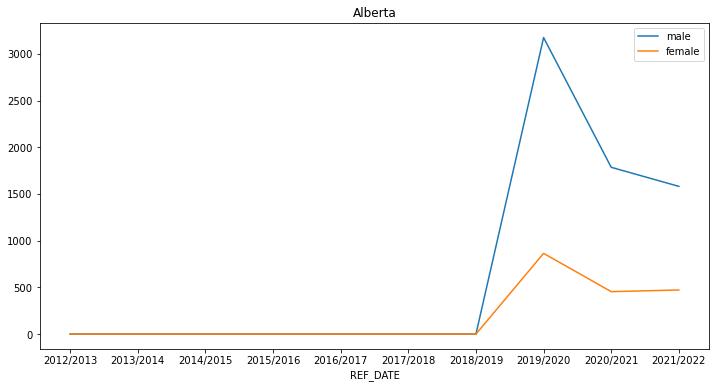

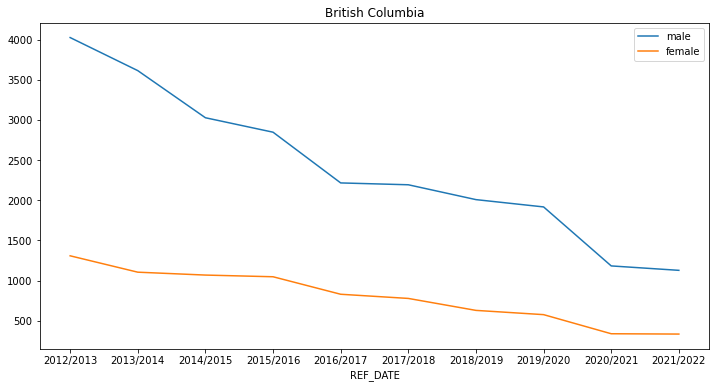

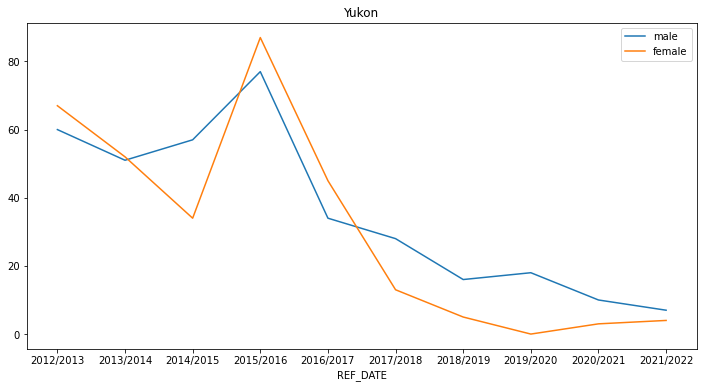

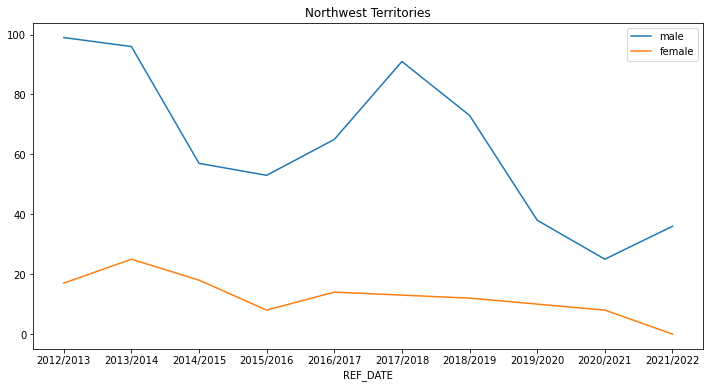

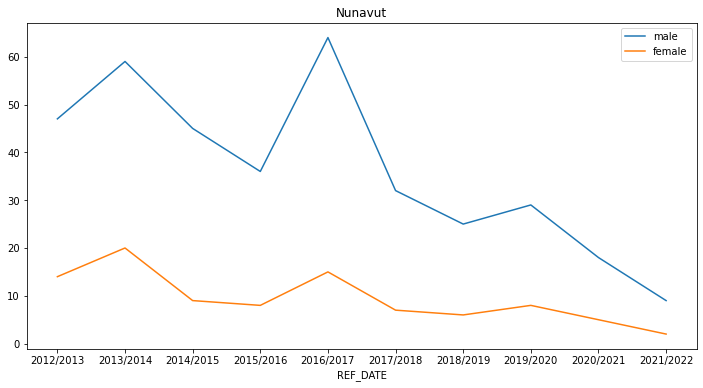

In [154]:
plotAdmissionRelease(geo_features)

## 2 plt.bar by age 

In [156]:
def plotAge(geo_features,date_feature):

    df_geo_0 = df[df.REF_DATE==date_feature]

    df_geo_1 = df_geo_0[df_geo_0['Sex'] =='Total, admissions by sex']
    df_geo_2 = df_geo_1[df_geo_1['Correctional services'] =='Total correctional services']
    df_geo_2.set_index('Age at time of admission',inplace = True,drop=False)
    df_geo_3 = df_geo_2.drop('Total, admissions by age',axis=0)
    df_geo_4 = df_geo_3[['GEO','Age at time of admission','VALUE']]

    for i, geo_feature in enumerate(geo_features):
        plt.bar(df_geo_4['Age at time of admission'],df_geo_4['VALUE'],alpha=0.4)
        plt.title(str(i+1) +'  '+date_feature+' '+ geo_feature)
        plt.xticks(rotation=30)
        plt.show()


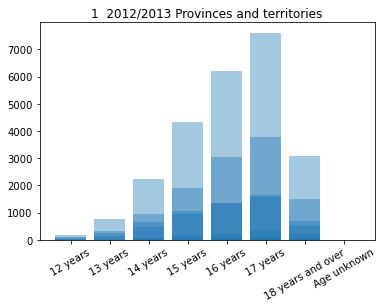

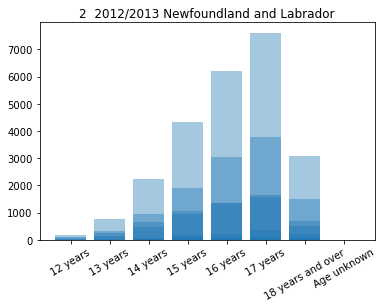

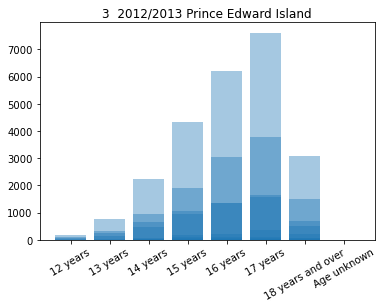

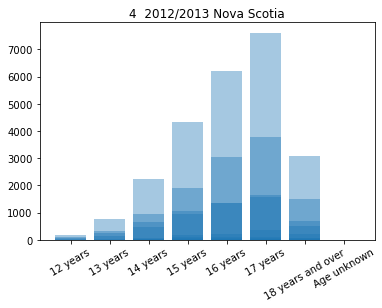

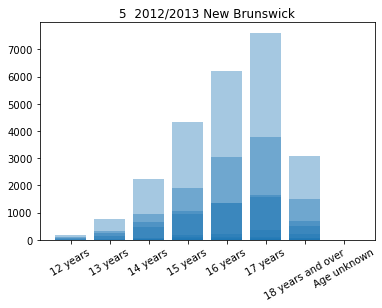

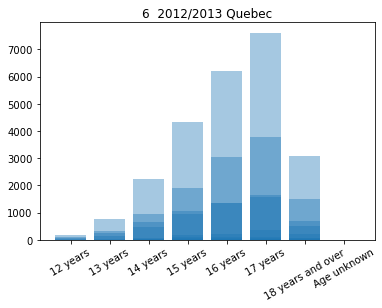

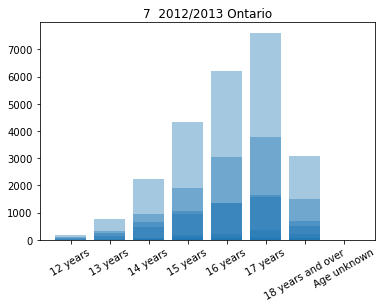

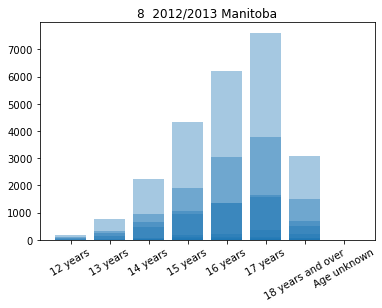

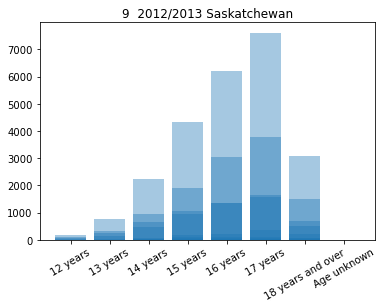

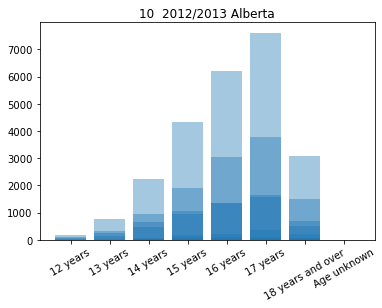

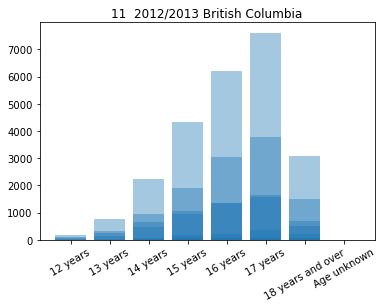

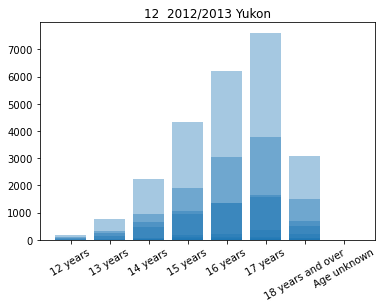

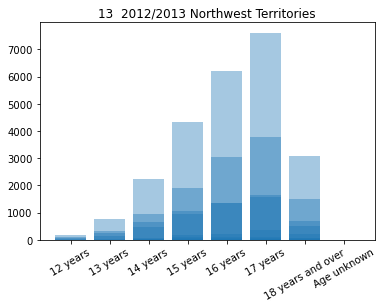

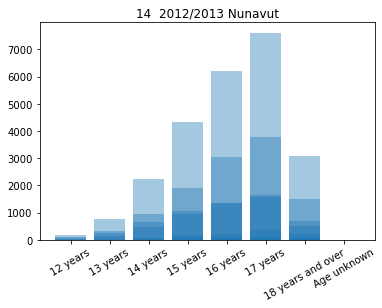

In [157]:
date_feature = '2012/2013'
plotAge(geo_features,date_feature)


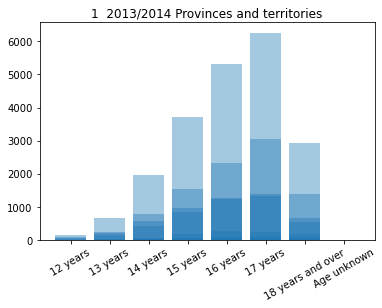

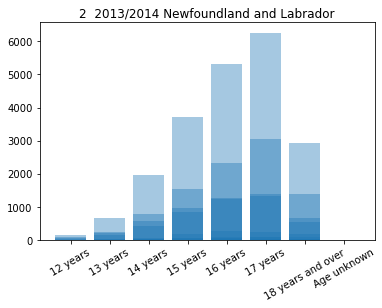

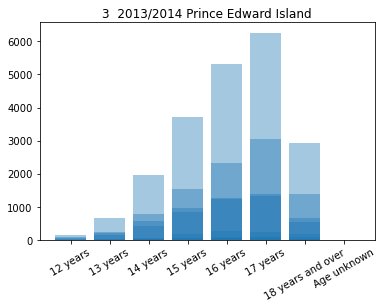

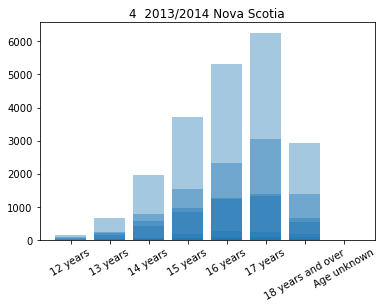

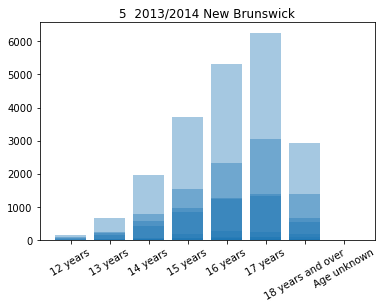

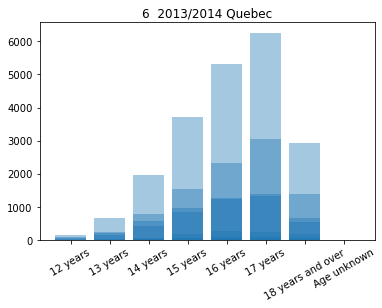

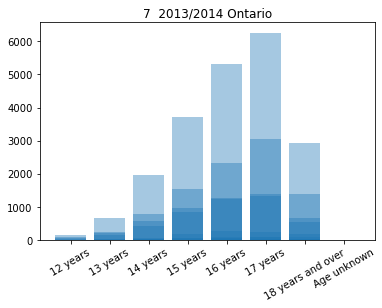

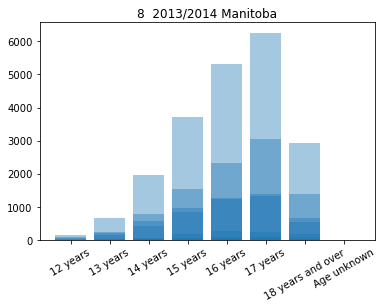

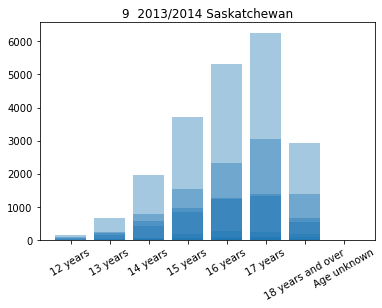

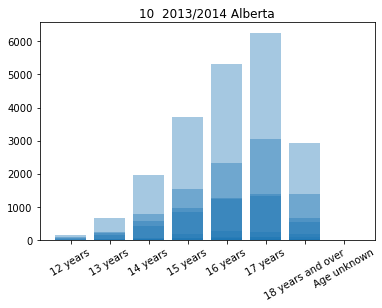

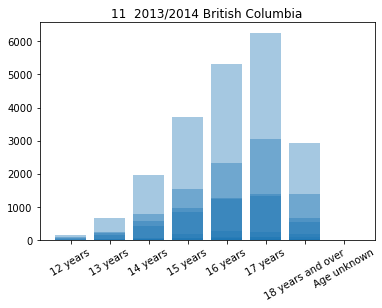

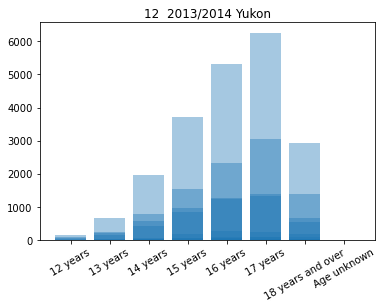

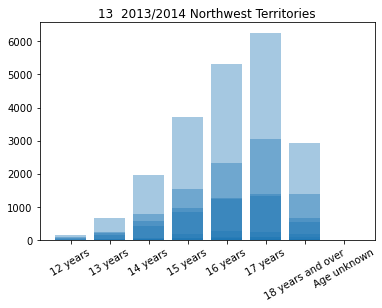

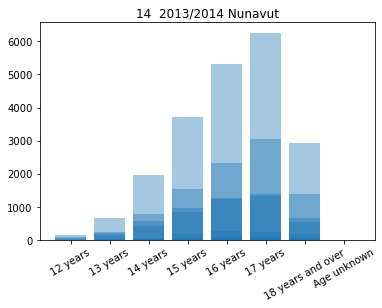

In [158]:
date_feature = '2013/2014'
plotAge(geo_features,date_feature)

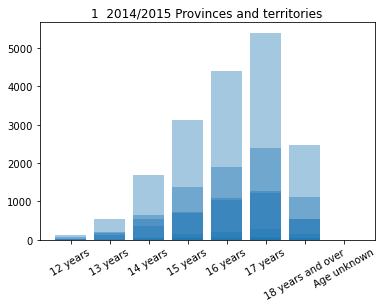

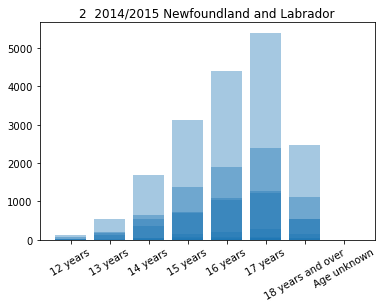

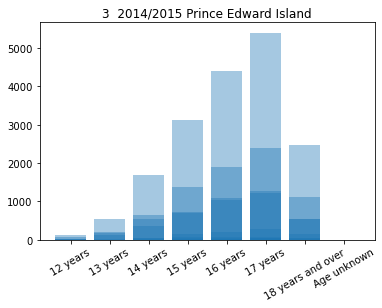

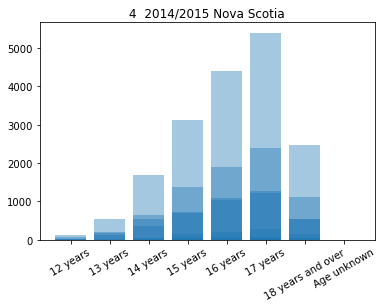

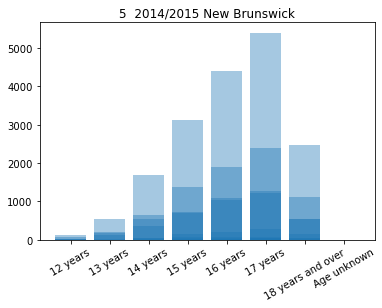

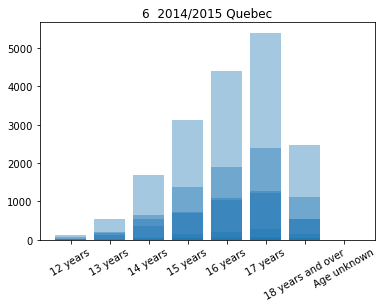

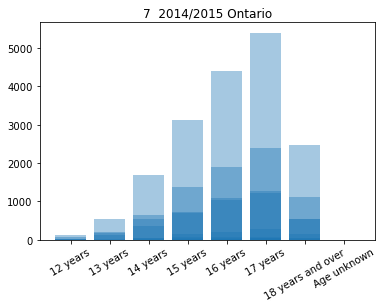

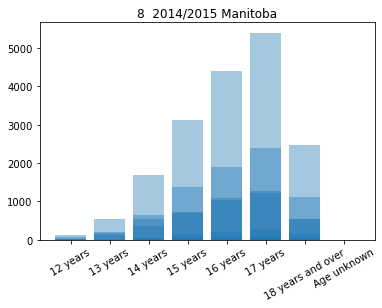

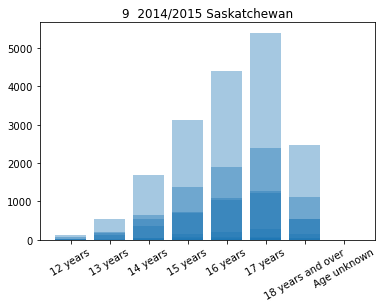

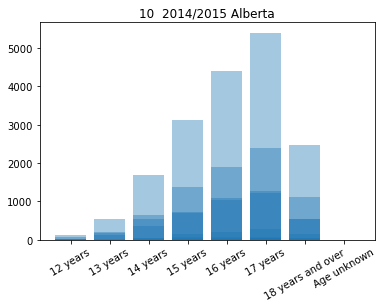

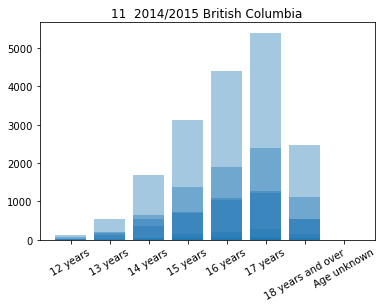

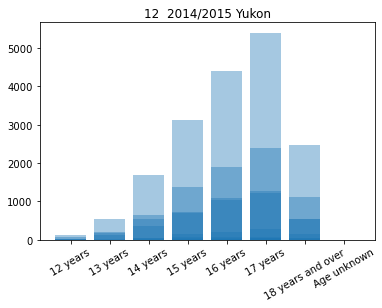

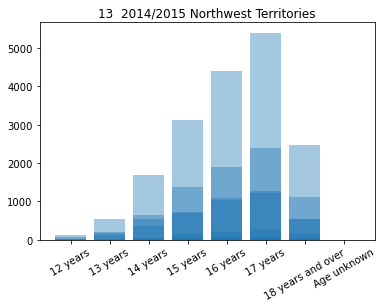

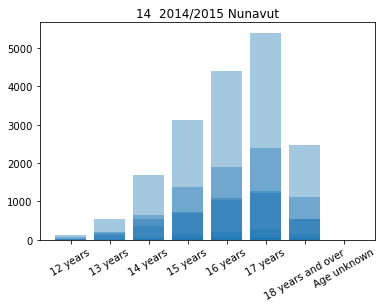

In [159]:
date_feature = '2014/2015'
plotAge(geo_features,date_feature)

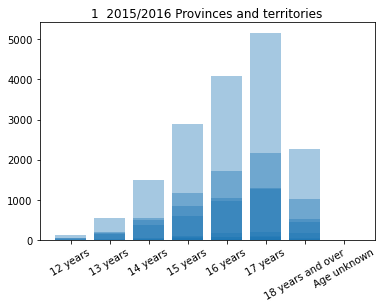

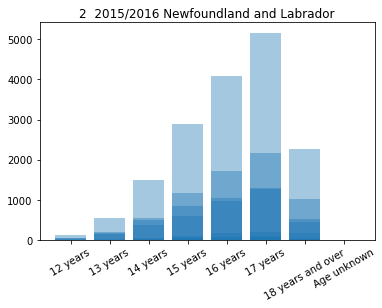

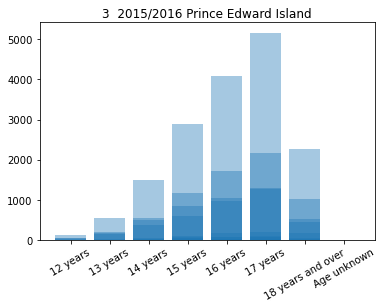

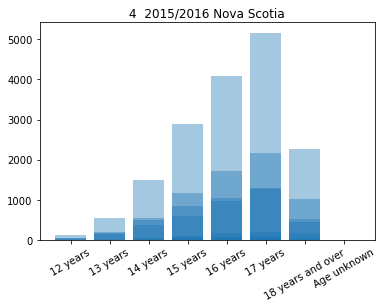

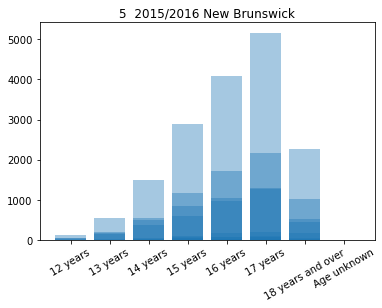

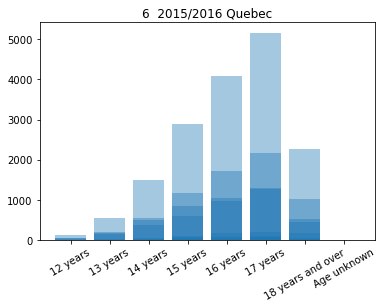

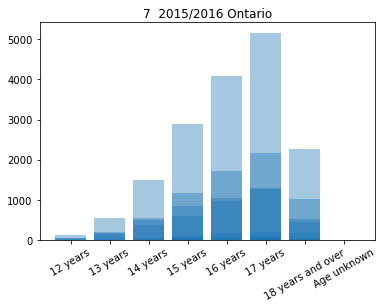

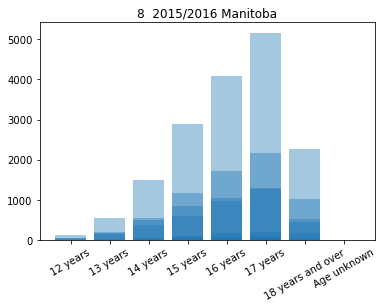

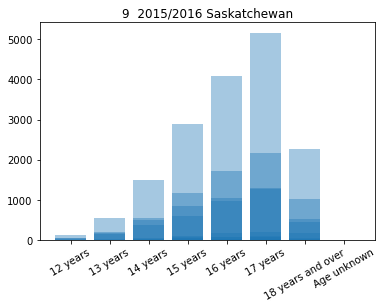

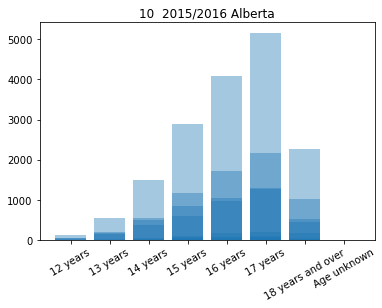

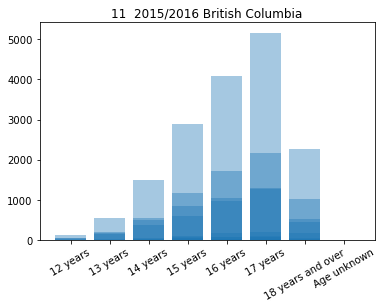

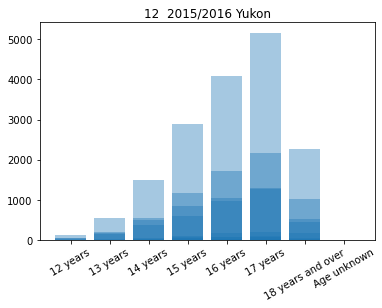

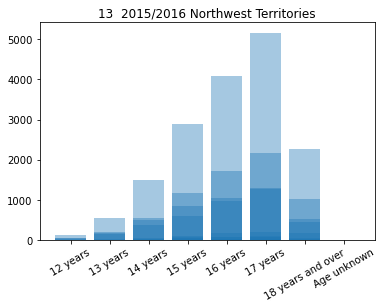

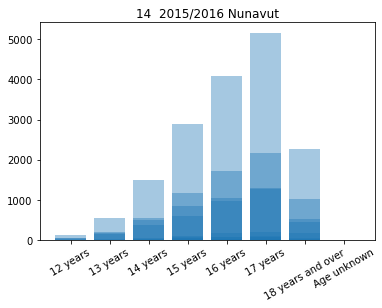

In [160]:
date_feature = '2015/2016'
plotAge(geo_features,date_feature)

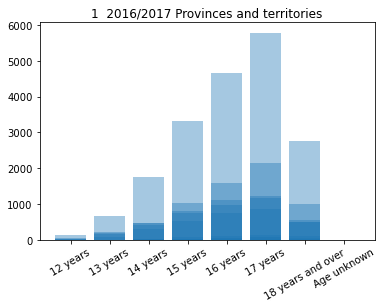

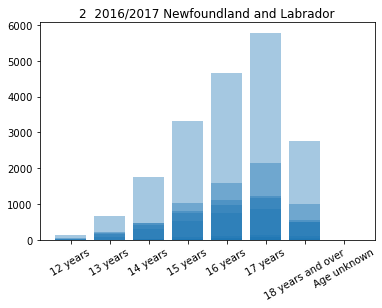

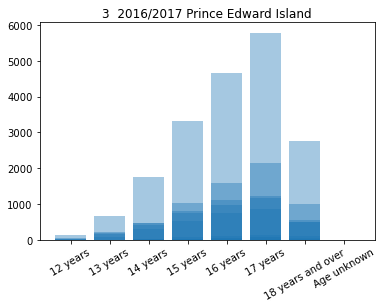

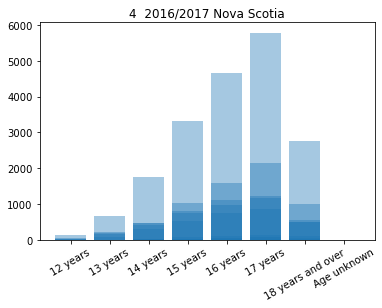

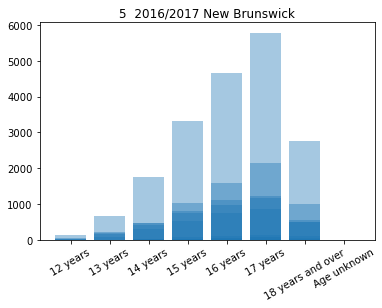

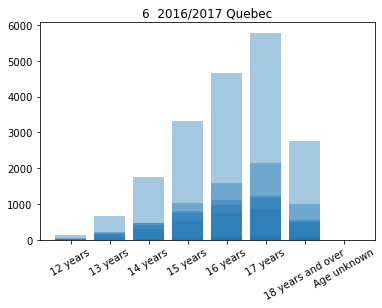

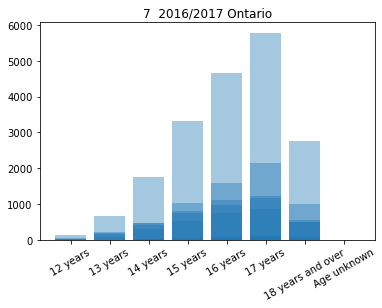

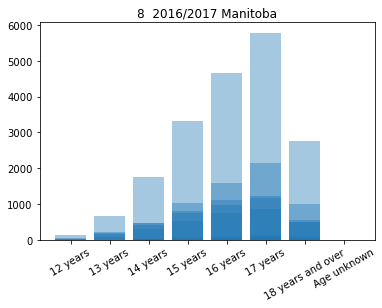

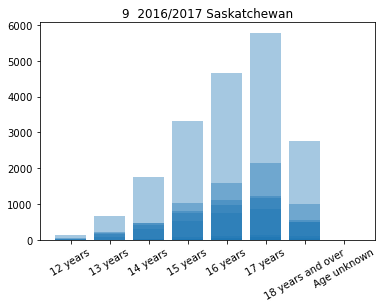

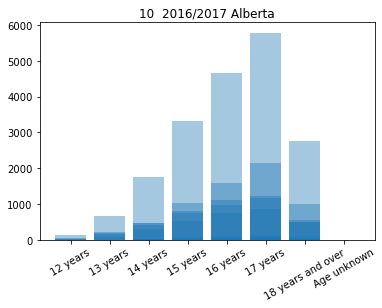

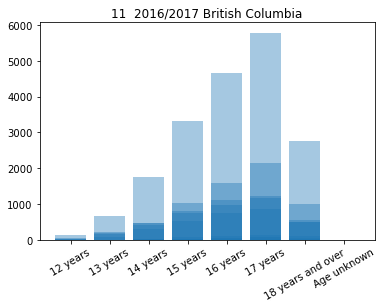

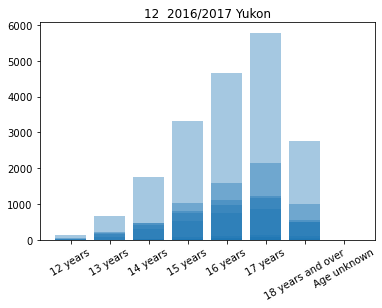

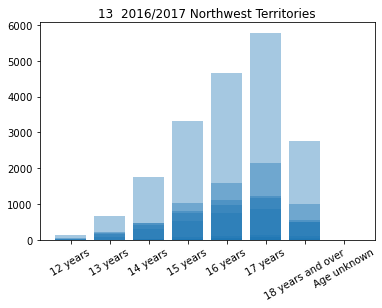

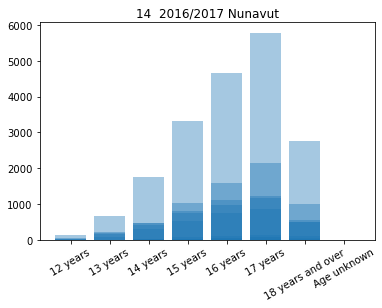

In [161]:
date_feature = '2016/2017'
plotAge(geo_features,date_feature)

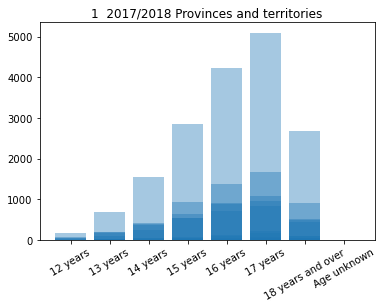

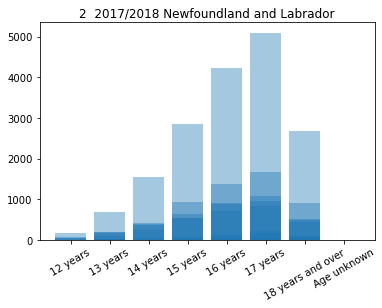

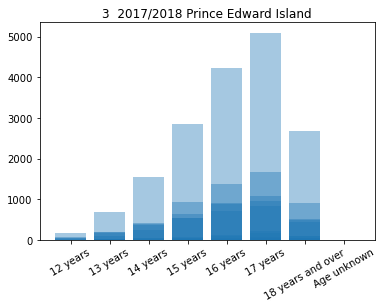

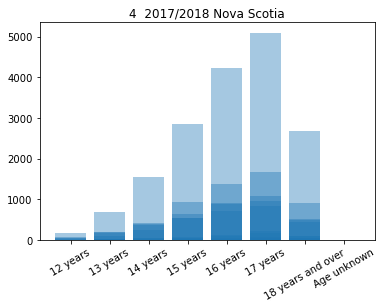

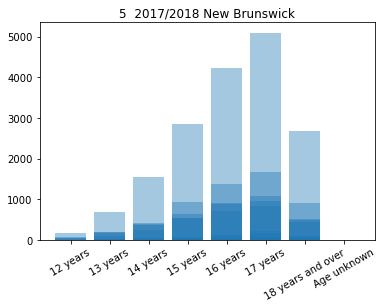

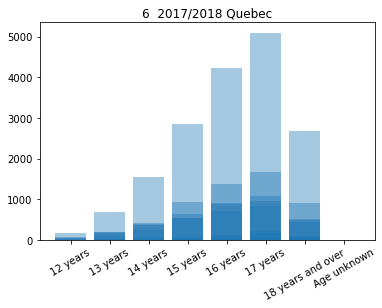

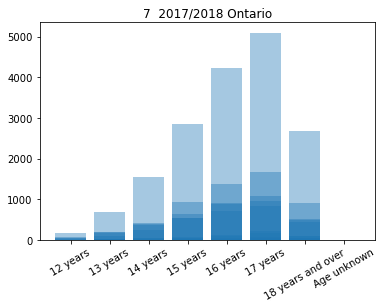

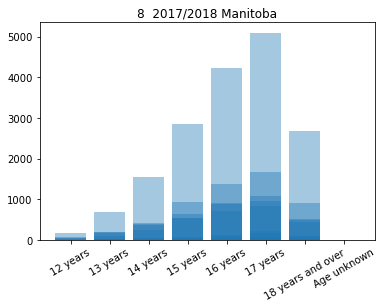

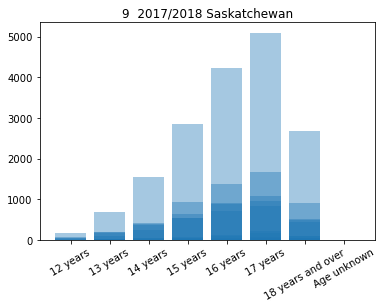

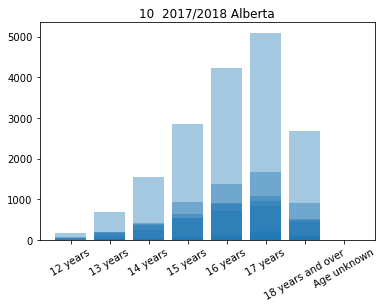

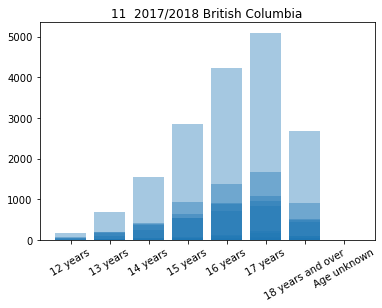

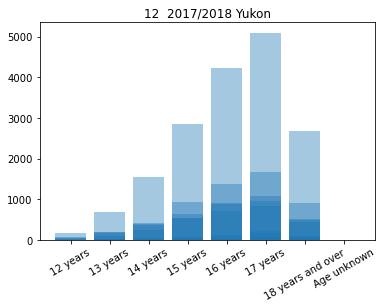

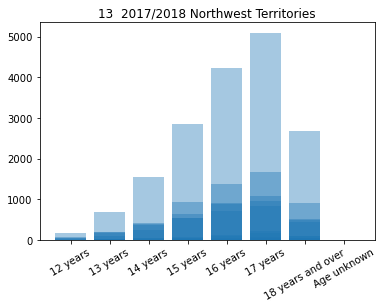

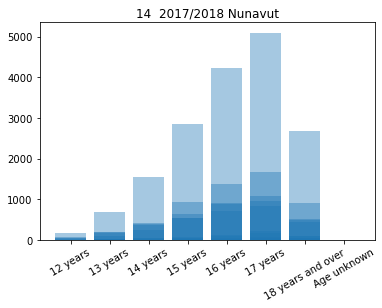

In [162]:
date_feature = '2017/2018'
plotAge(geo_features,date_feature)

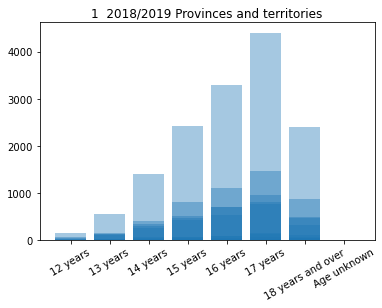

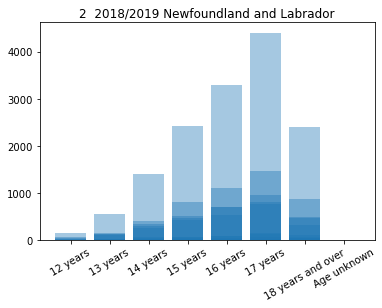

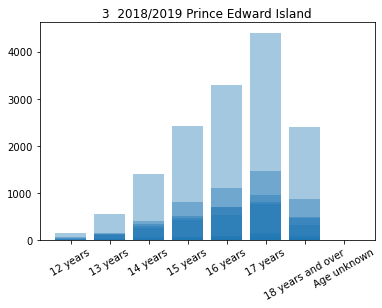

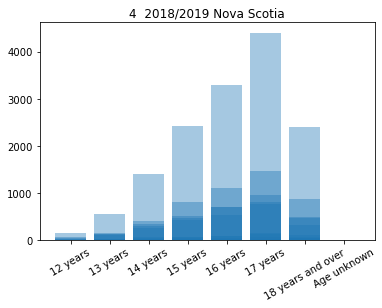

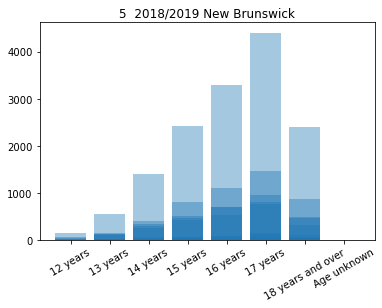

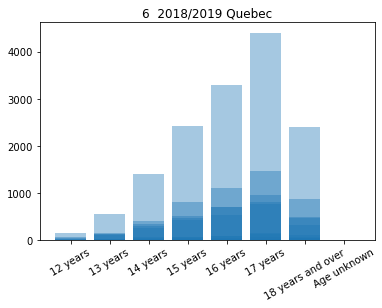

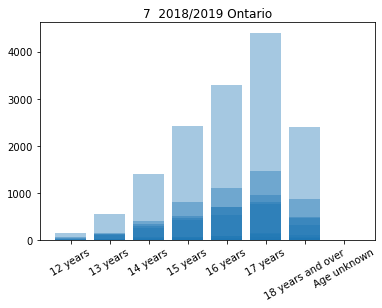

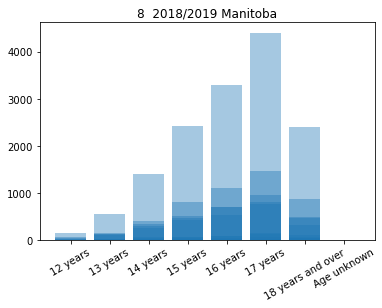

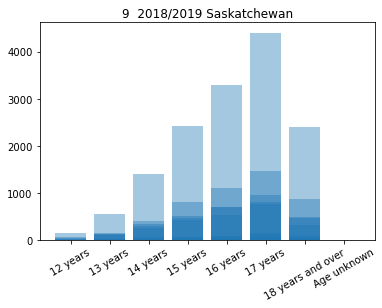

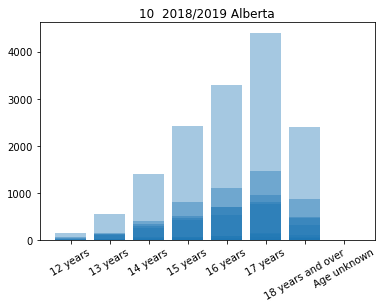

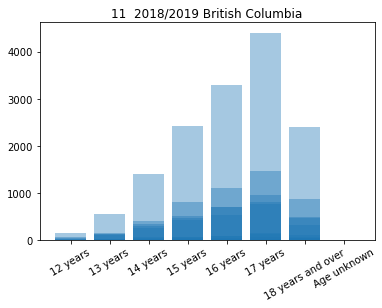

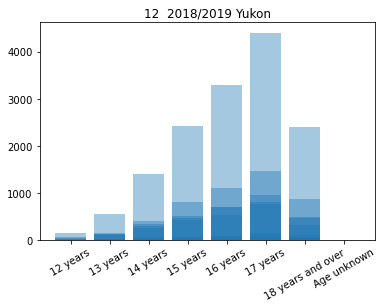

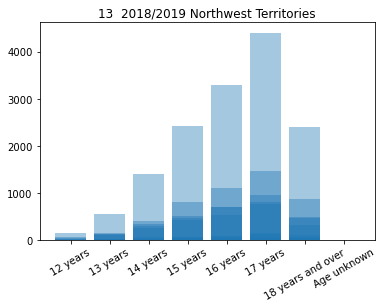

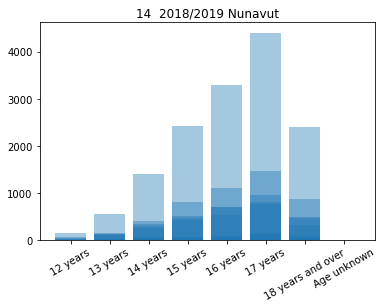

In [163]:
date_feature = '2018/2019'
plotAge(geo_features,date_feature)

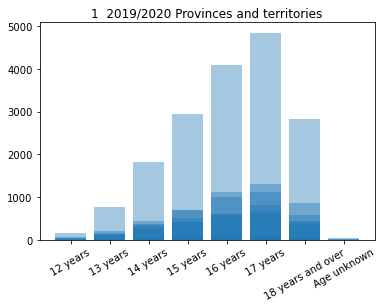

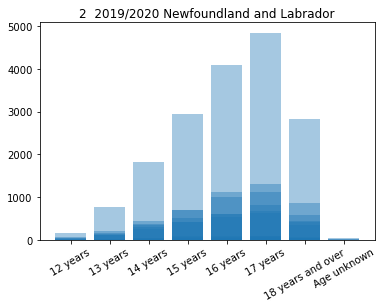

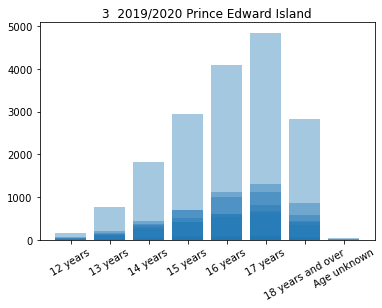

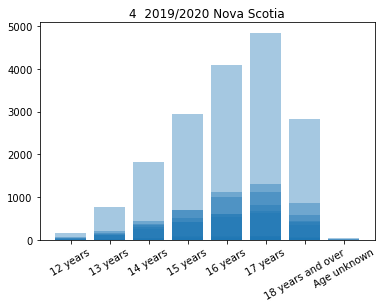

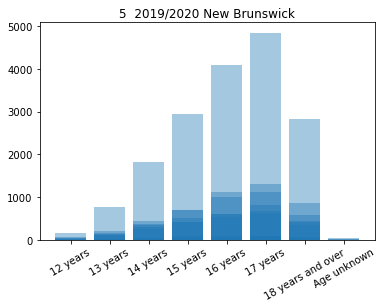

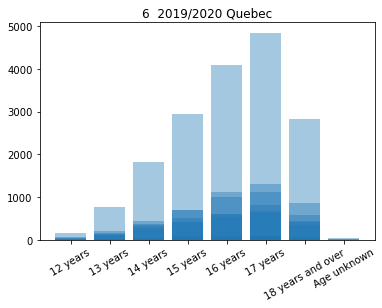

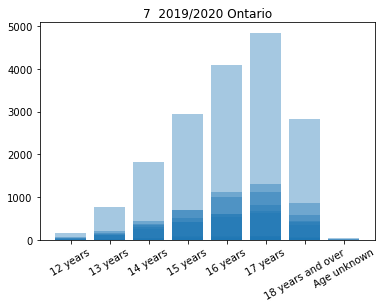

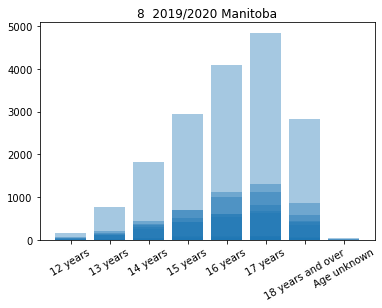

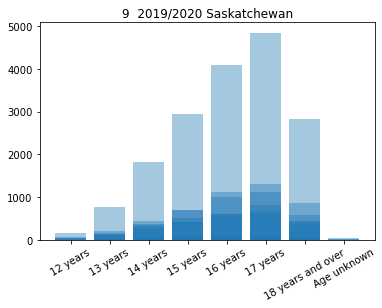

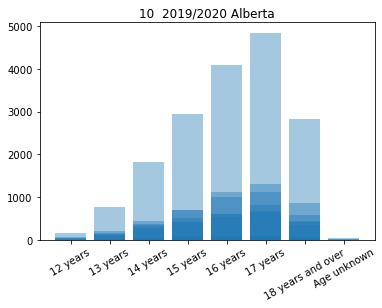

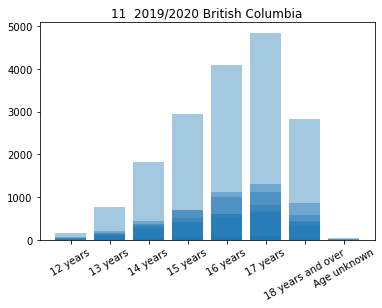

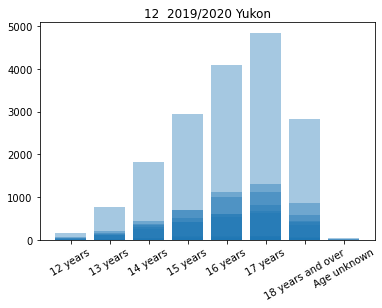

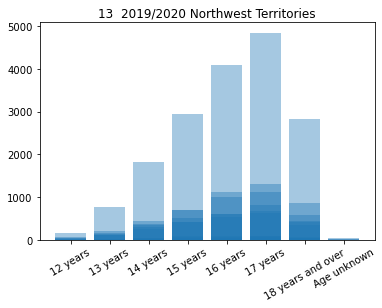

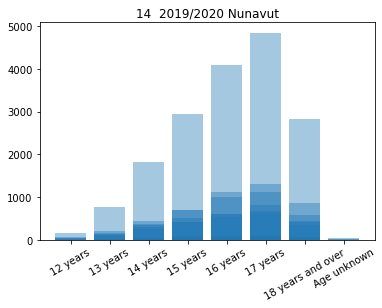

In [164]:
date_feature = '2019/2020'
plotAge(geo_features,date_feature)

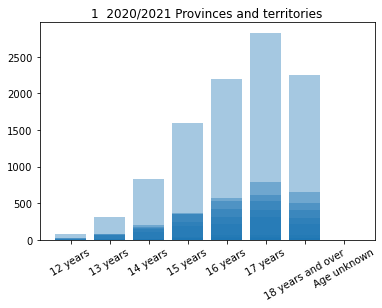

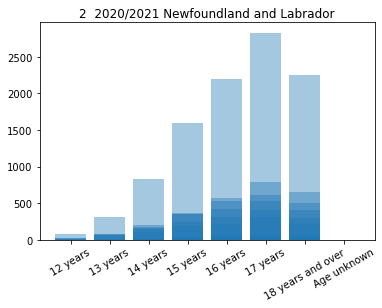

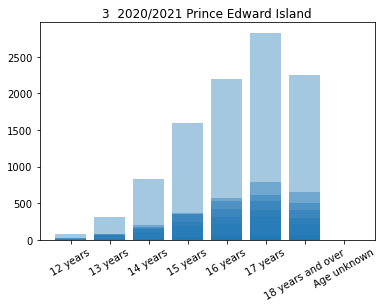

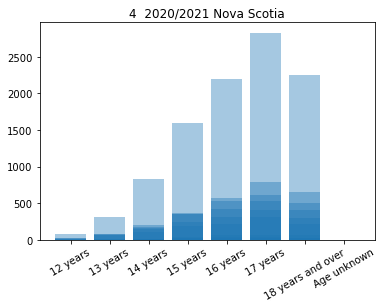

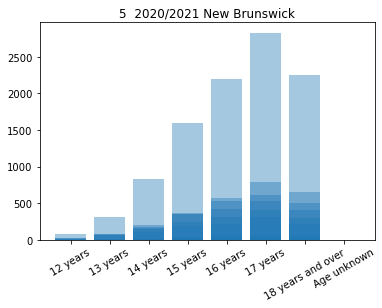

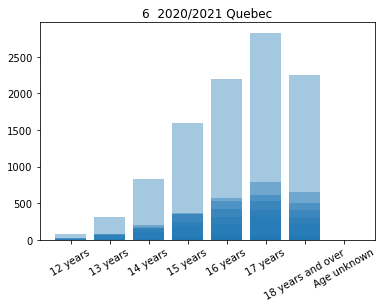

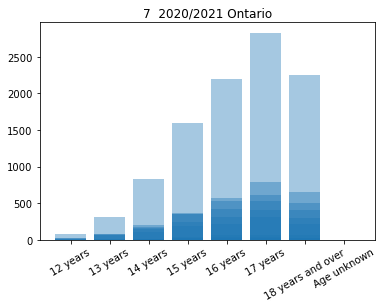

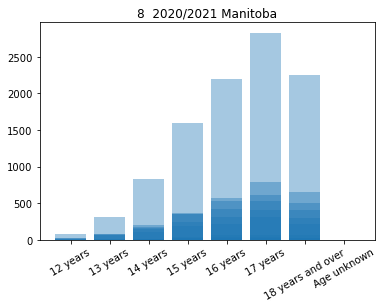

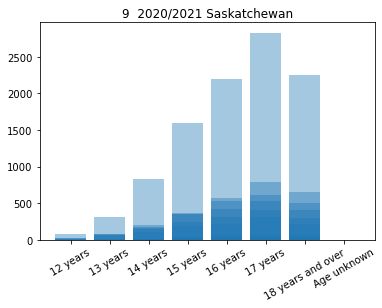

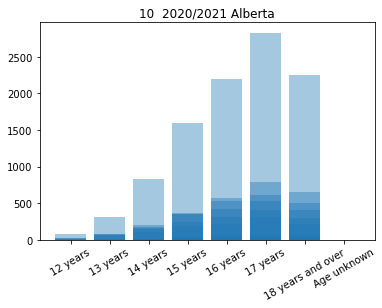

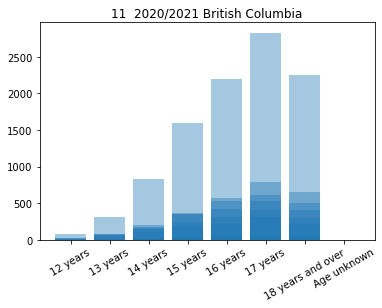

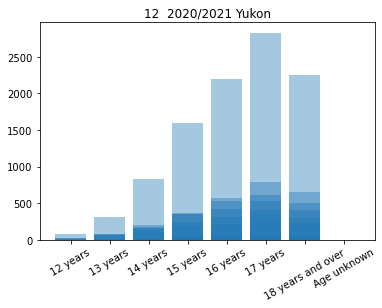

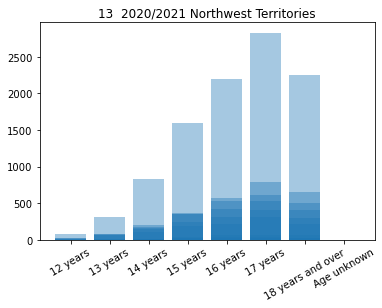

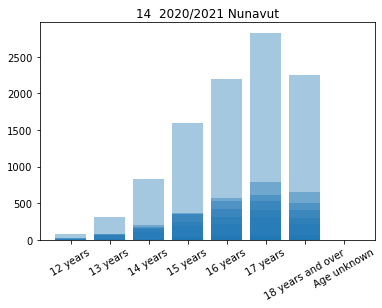

In [165]:
date_feature = '2020/2021'
plotAge(geo_features,date_feature)

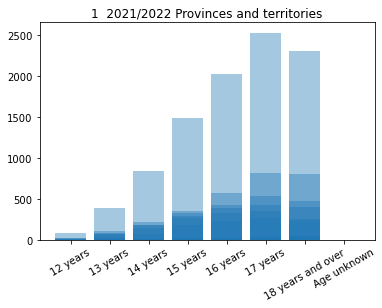

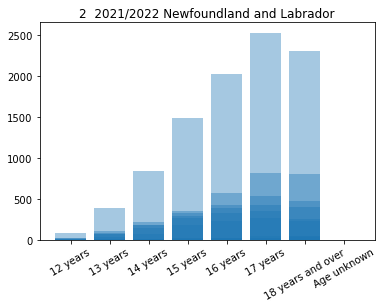

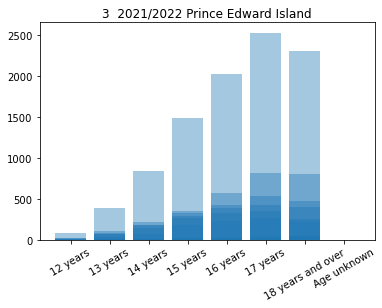

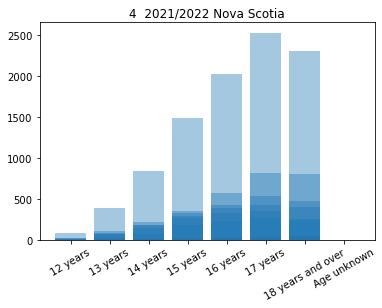

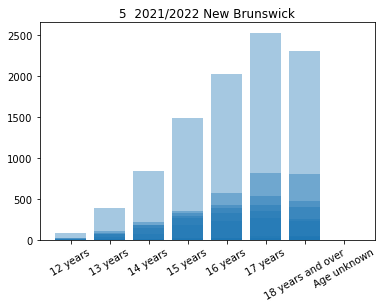

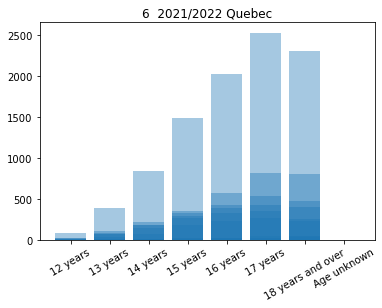

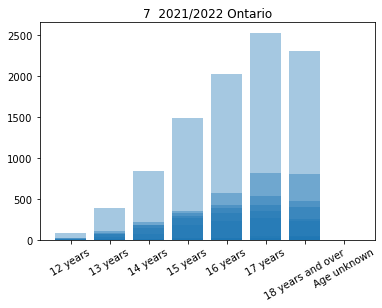

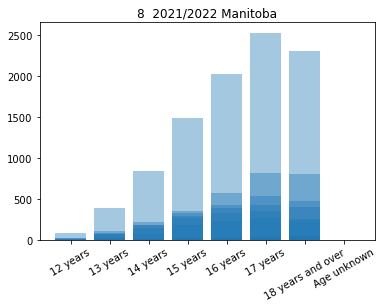

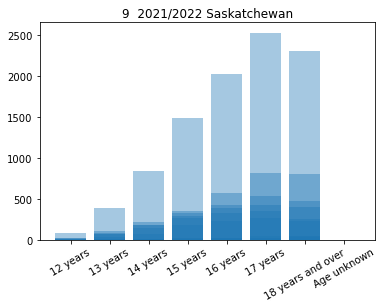

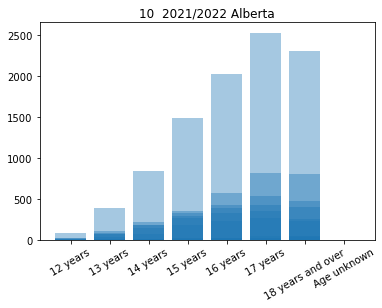

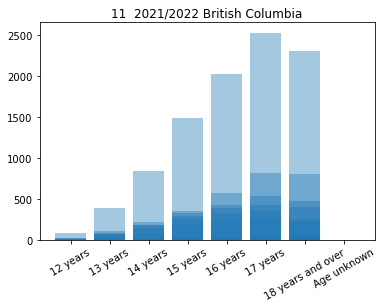

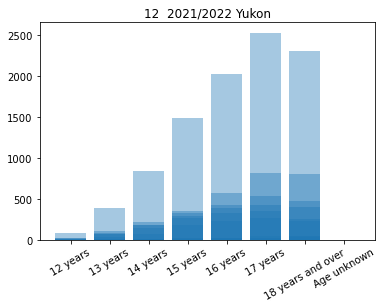

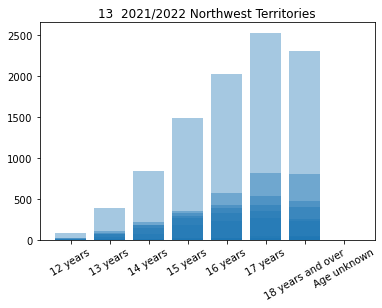

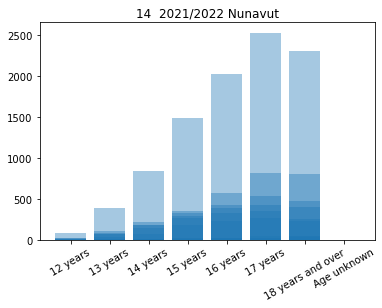

In [166]:
date_feature = '2021/2022'
plotAge(geo_features,date_feature)